In [1]:
from threshold_segmentation import ThresholdSegmentation

In [19]:
import sys
import numpy as np
import h5py
from matplotlib import pyplot as plt
from pathlib import Path
import cv2

In [3]:
import IPython

%load_ext autoreload
%autoreload 2

In [4]:
# Open the HDF5 file
DATA_FOLDER = Path("/home/rai/Documents/MSCE/Sem2/ami/project_datashare")
filepath = DATA_FOLDER / "sample02.pre"
file = h5py.File(filepath, 'r')

# Access the dataset
# List dataset in the file
amplitude = file['amplitude/images']
phase = file['phase/images']
#label = file['label/ground_truth']
#mask = file['mask/images']

nimgs = np.shape(amplitude)[0]
print(nimgs)

7961


In [32]:
imgs_idx = range(0, 20)

imgs_phase = []
imgs_ampl = []
for img_idx in imgs_idx:
    imgs_phase.append(phase[img_idx])
    imgs_ampl.append(amplitude[img_idx])

In [72]:
ts = ThresholdSegmentation(imgs_phase, imgs_ampl)

In [73]:
masks = ts.segment()

In [74]:
def plot_outlines(imgs, masks):
    # plot image with outlines overlaid in red
    for idx, img in enumerate(imgs):
        fig, axes = plt.subplots(1, 1, figsize=(10, 10))
        contours, _ = cv2.findContours(masks[idx], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        img_pos = np.abs(img)
        img_norm = ((img_pos - np.min(img_pos)) / (np.max(img_pos) - np.min(img_pos)) * 255).astype(np.uint8)
        
        # Draw contours on the converted image
        for contour in contours:
            cv2.drawContours(img_norm, [contour], 0, (255, 255, 255), thickness=1)


        # Convert the image to RGB format for Matplotlib
        #img_rgb = cv2.cvtColor(img_norm, cv2.COLOR_GRAY2RGB)

        # Display the image with contours
        plt.imshow(img_norm, cmap="jet")
        plt.show()

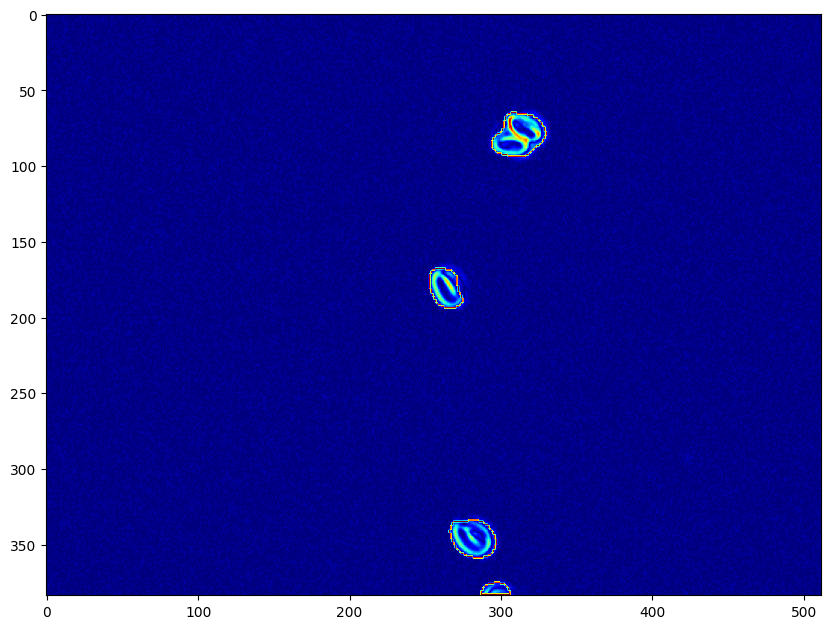

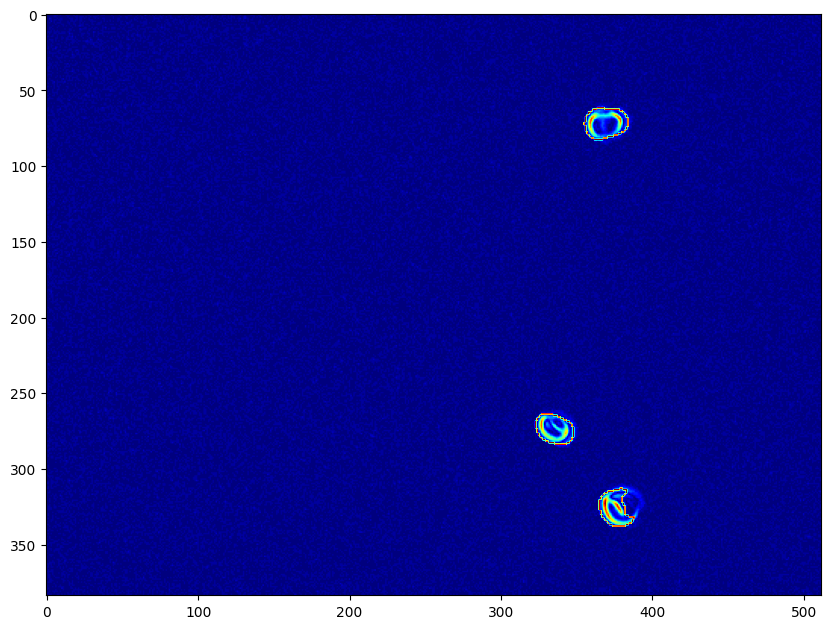

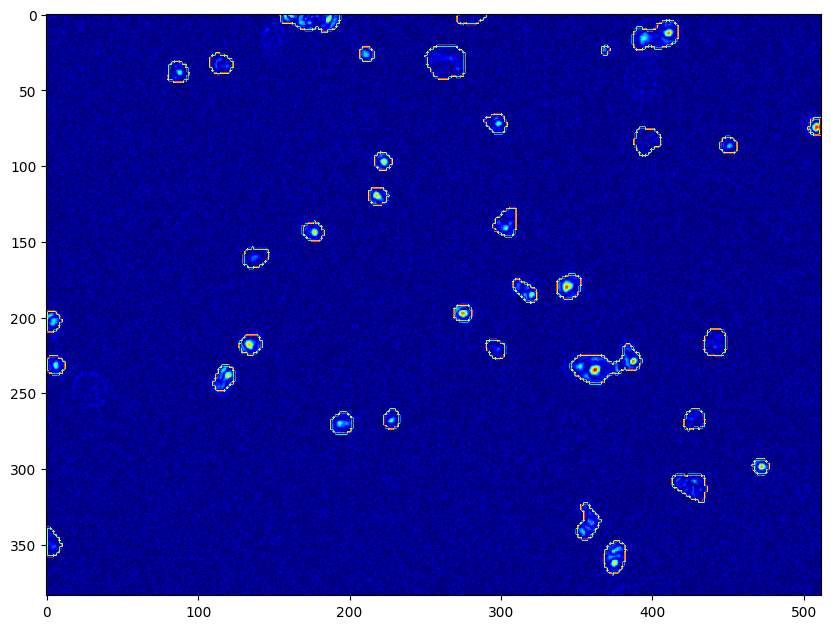

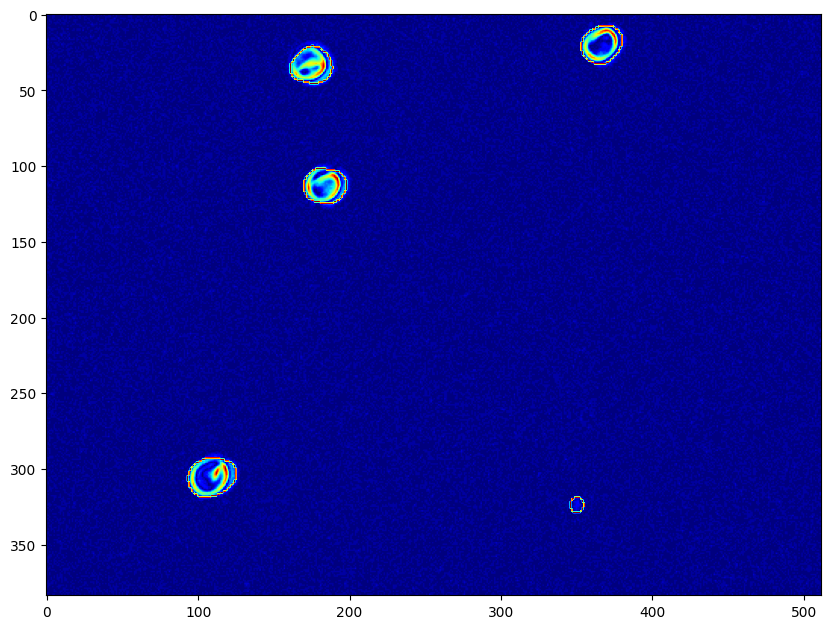

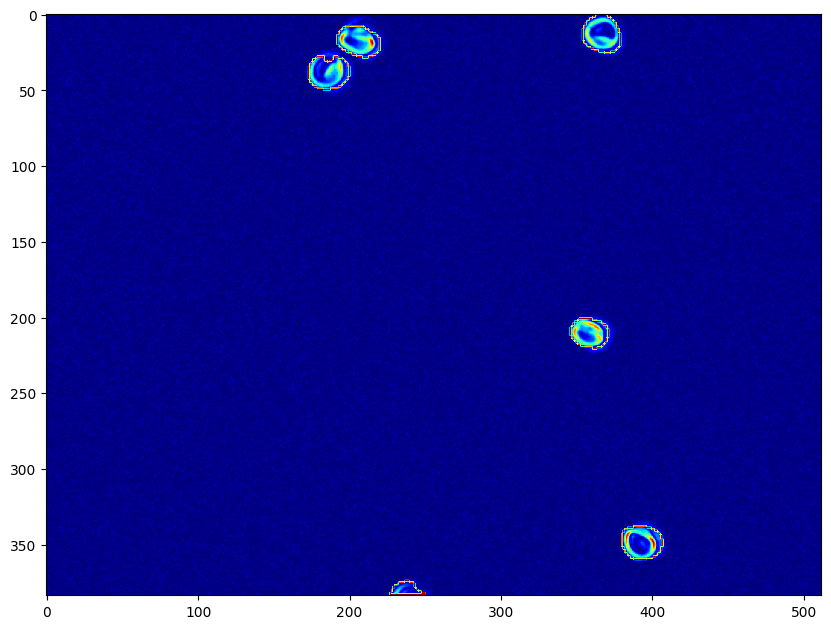

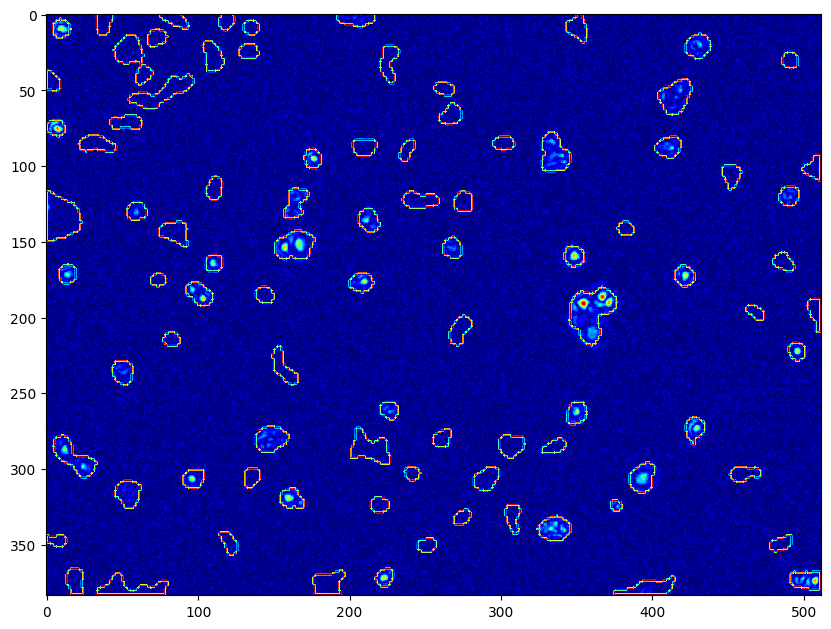

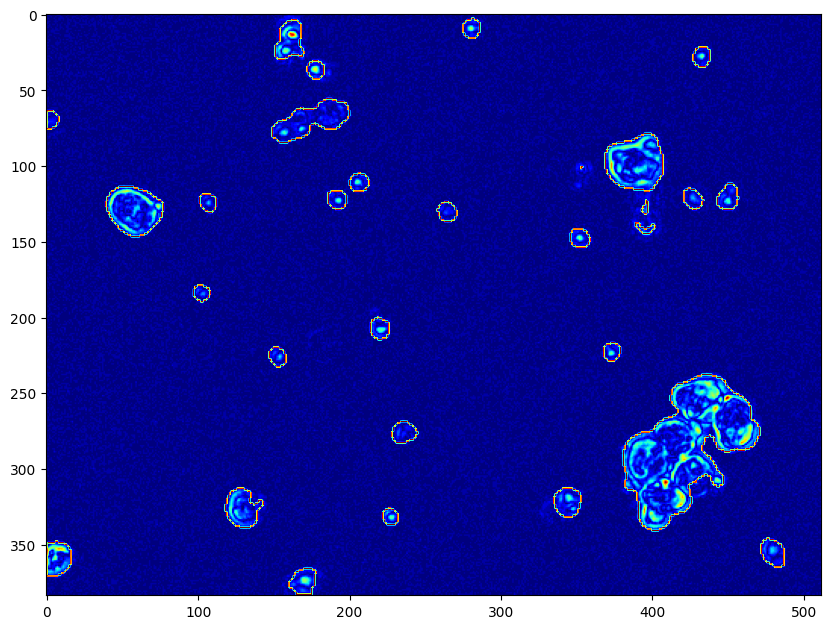

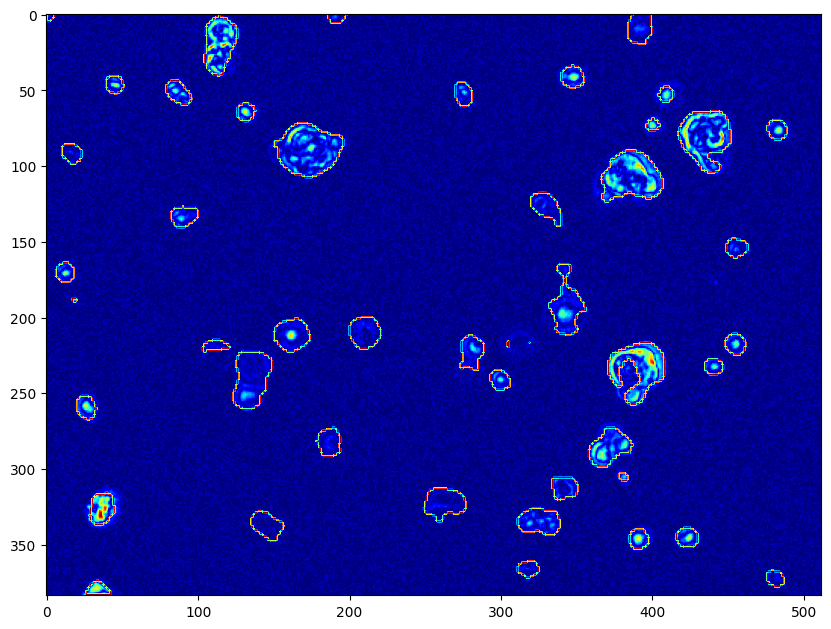

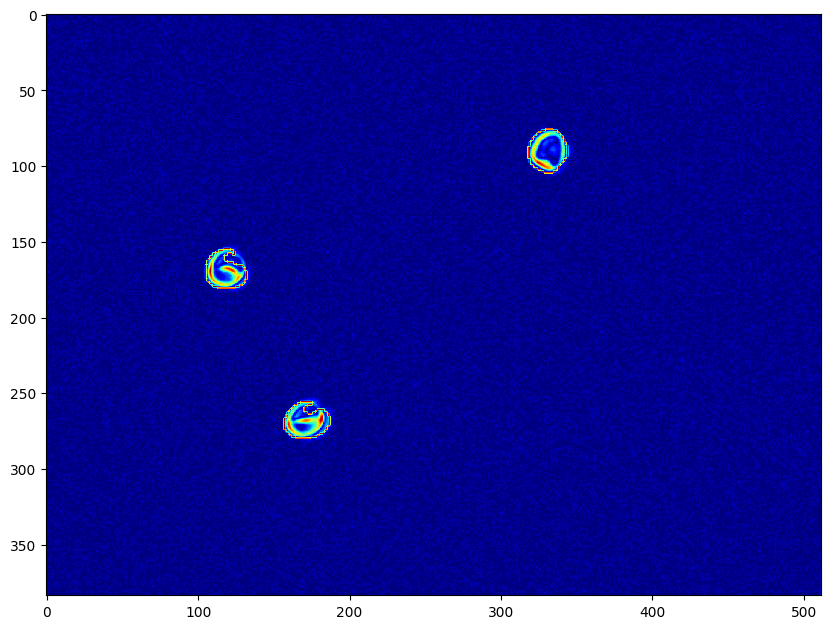

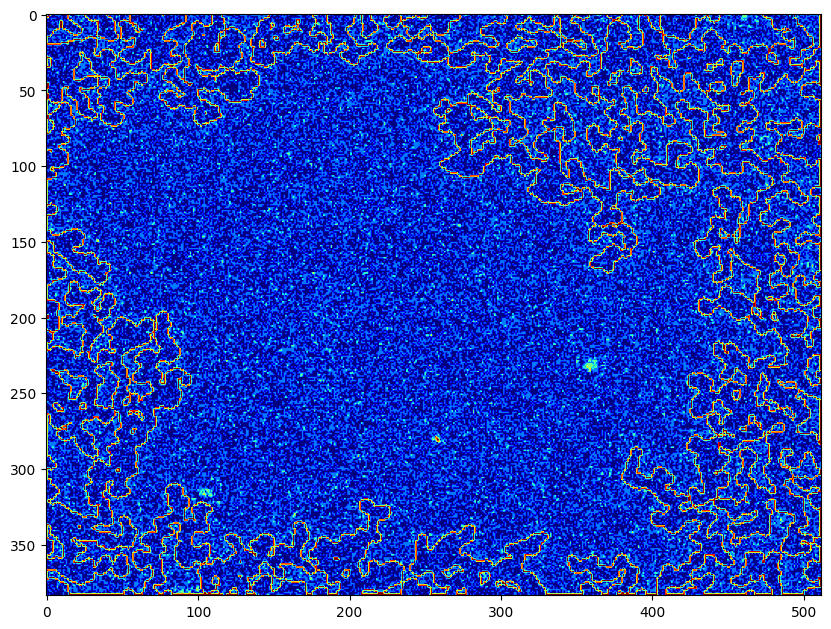

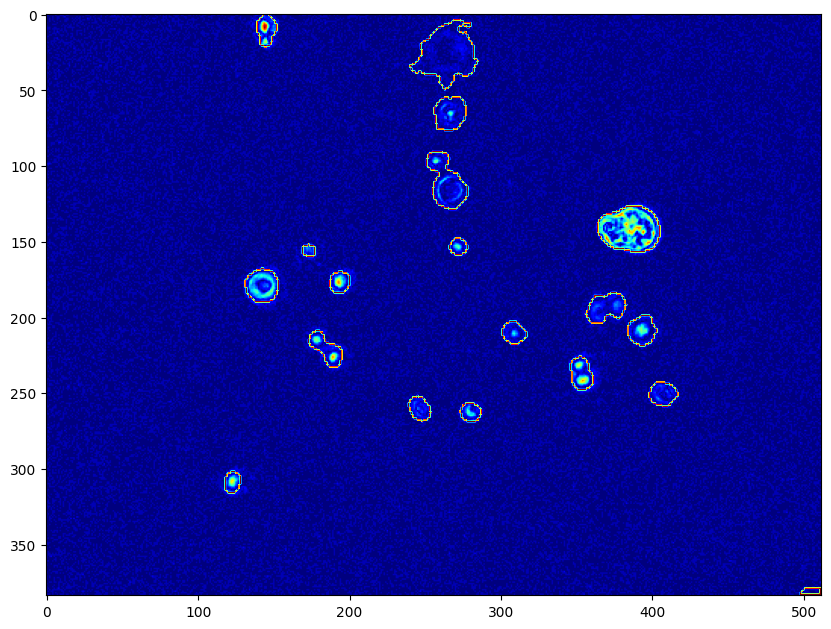

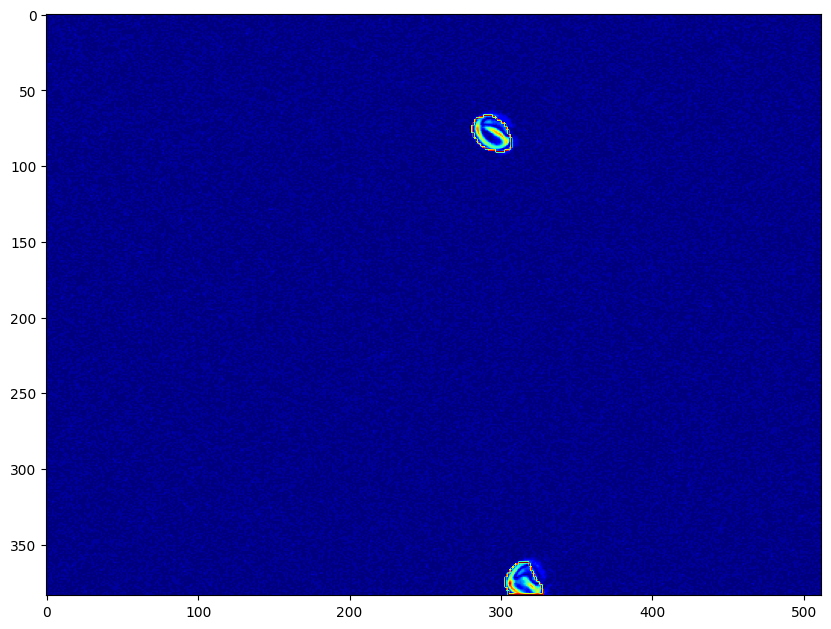

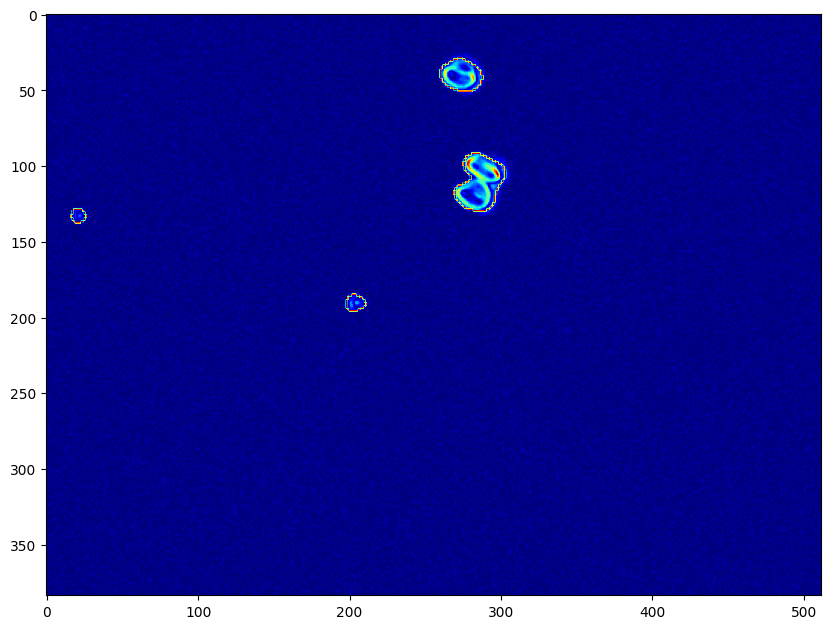

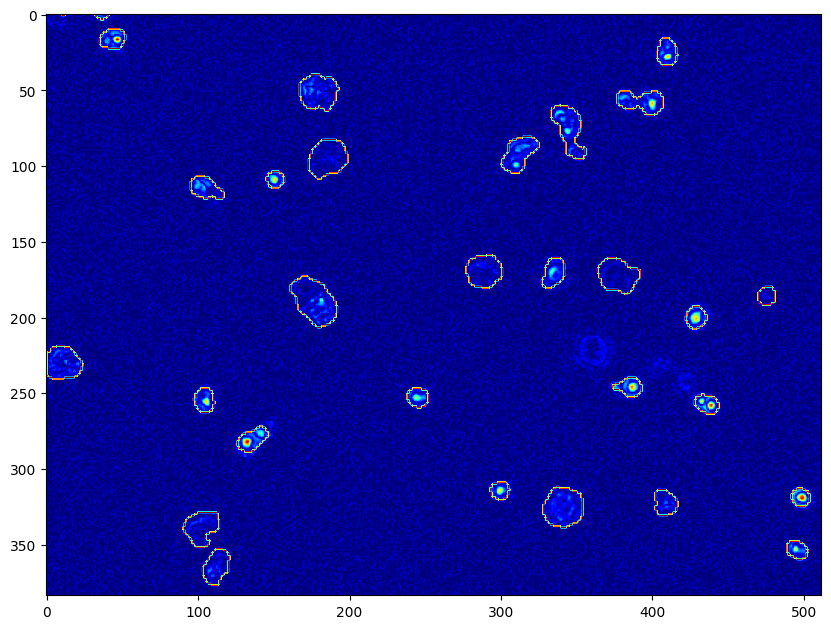

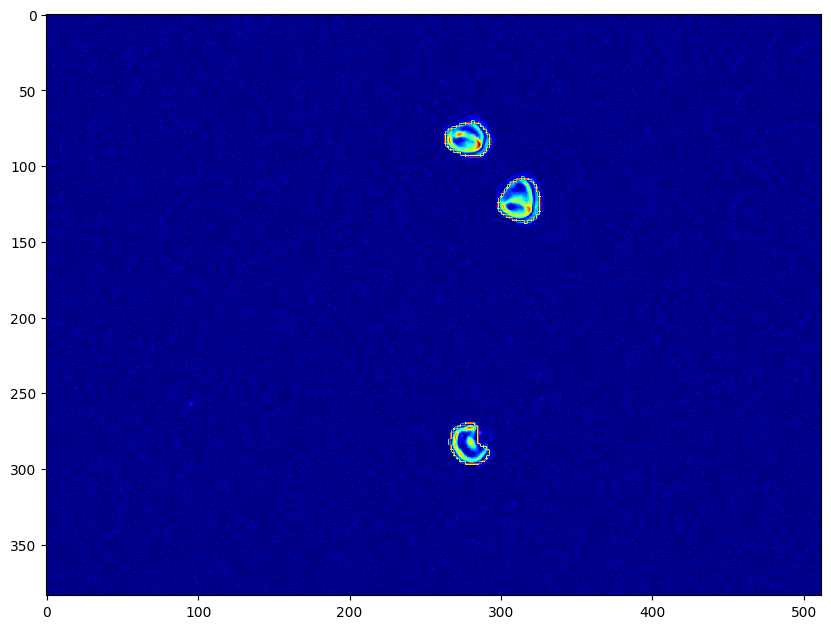

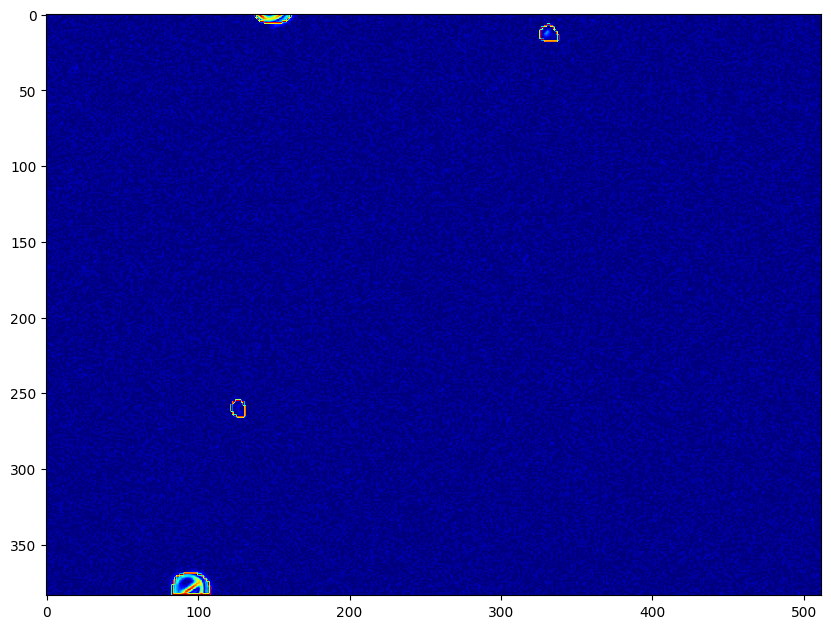

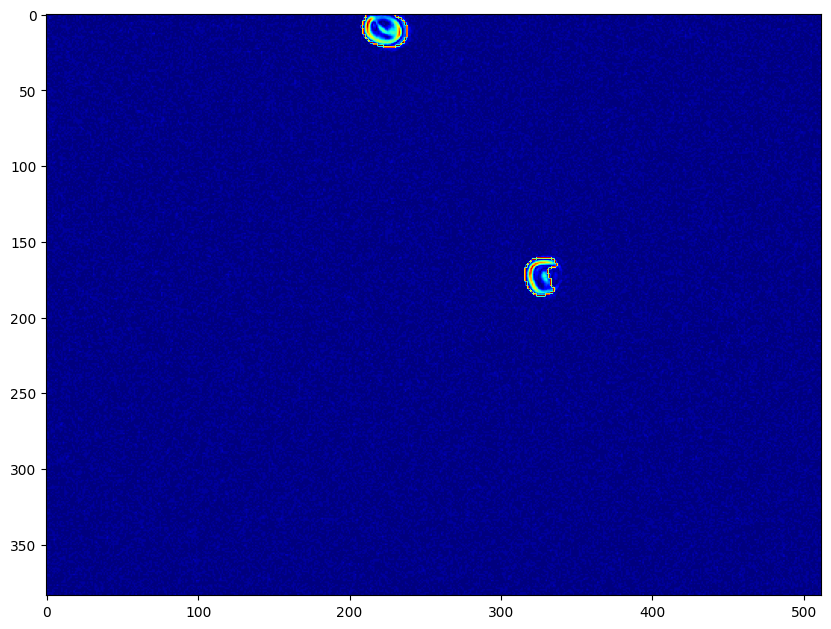

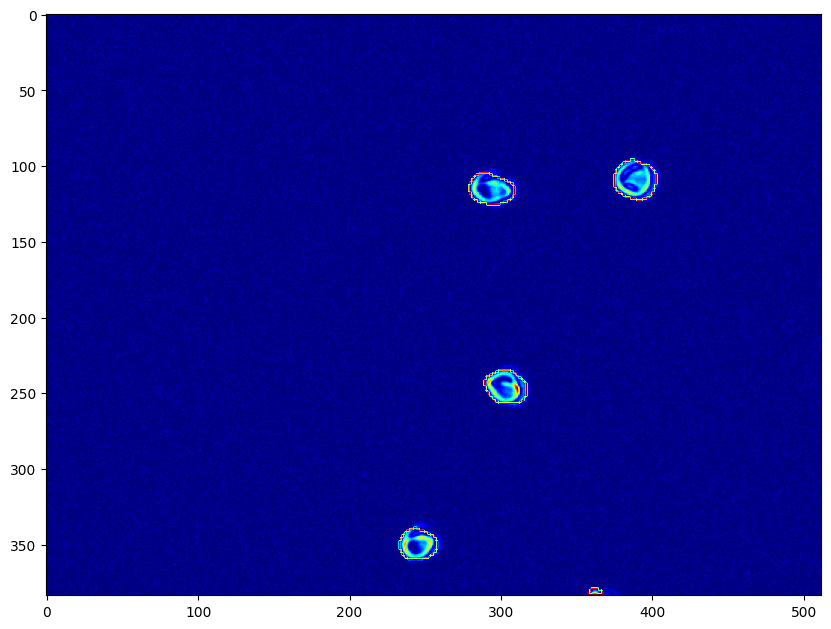

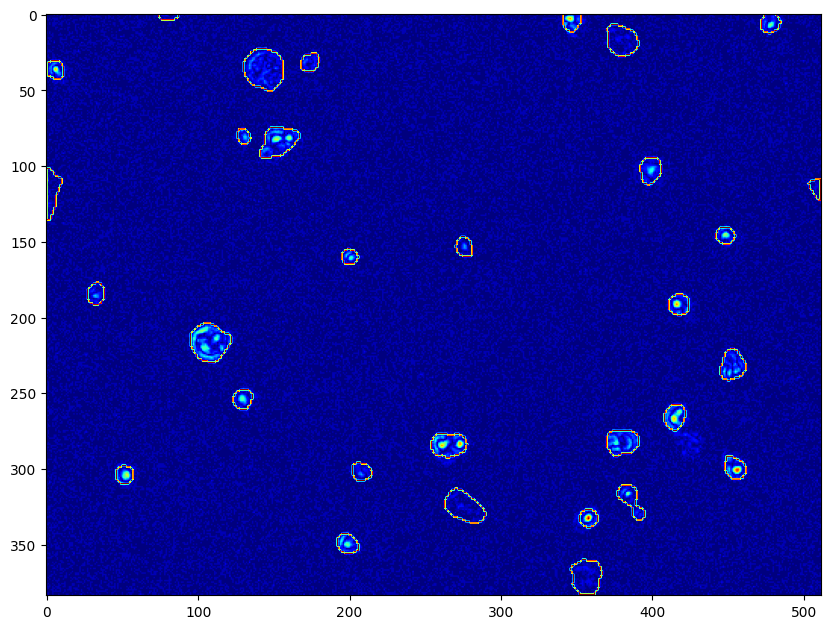

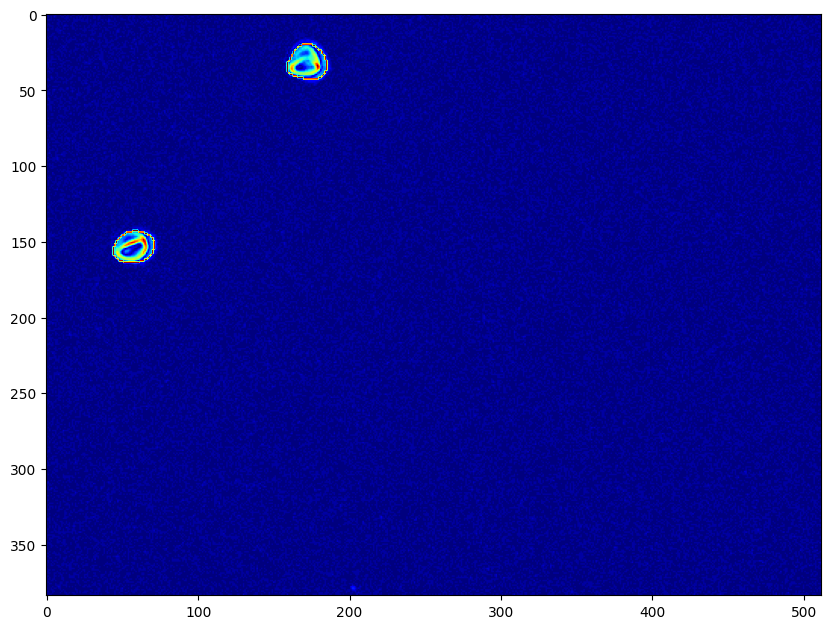

In [76]:
plot_outlines(imgs_ampl, masks)